# Assignment 1: American Express - Default Prediction

#### Ankita Kokkera - 06032419
#### Aria Wang - 06047688
#### Tsamara Esperanti Erwin - 06042275
#### Jean-Marc Yao - 06055972
#### Amer Mulla - 06027165

## Introduction to Deep Learning & GenAI

The AmEx Credit Default Prediction challenge was a competition to predict the probability that a customer does not pay back their credit card balance amount in the future based on their monthly customer profile. The target binary variable is calculated by observing 18 months performance window after the latest credit card statement, and if the customer does not pay due amount in 120 days after their latest statement date it is considered a default event.

In this assignment, you will tackle this challenge using some deep learning models. You will:
- Train a neural network using Keras
- Understand ERM via loss functions and metrics
- Explore learning rates
- Implement a cost-sensitive loss
- Evaluate business cost via thresholding

I have preprocessed the data to simplify the challenge, reducing the number of features and samples, and imputing missing values. If you are interested, you can view the original dataset and challenge at https://www.kaggle.com/competitions/amex-default-prediction/

For this assignment you are given preprocessed datasets:
- `X_train_top50.csv`
- `X_test_top50.csv`
- `y_train.csv`
- `y_test.csv`

Follow the hints in each code‐block title to fill in the missing parts of each function, then run each code-block to complete the assignment. Ensure your virtual environment is activated before launching the Jupyter Notebook. For detailed instructions, see `environmentsetup.pdf`.

## Installing the Packages

In [26]:
!pip install pandas
!pip install scikit-learn
!pip install tensorflow
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 15.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 8.4 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6/6 [matplotlib]6 [matplotlib]


## 1. Load the data

Load the datasets. Print their shapes and show the first few rows.


In [11]:
import pandas as pd

#Read in the datasets, using 'customer_ID' as the index column.
X_train = pd.read_csv('data/X_train_top50.csv', index_col='customer_ID')
X_test = pd.read_csv('data/X_test_top50.csv', index_col='customer_ID')
y_train = pd.read_csv('data/y_train.csv', index_col='customer_ID').values.ravel()
y_test = pd.read_csv('data/y_test.csv', index_col='customer_ID').values.ravel()

#Display the shapes of the datasets and the first few rows of the training features.
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)
X_train.head()

(50000, 50) (10000, 50)
(50000,) (10000,)


,B_16_last,B_18_last,B_18_mean,B_18_min,B_20_last,B_22_max,B_23_last,B_2_last,B_2_mean,B_2_min,...,P_2_last,P_2_max,P_2_mean,P_2_min,R_10_max,R_10_std,R_1_last,R_1_max,R_1_mean,R_1_std
customer_ID,,,,,,,,,,,,,,,,,,,,,
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a,0.006410,1.0080,0.8430,0.6460,0.007630,0.009950,0.04037,1.0080,1.0050,1.0000,...,0.9346,0.9604,0.9336,0.8687,0.008340,0.002386,0.006104,0.009224,0.004510,0.003081
00000fd6641609c6ece5454664794f0340ad84dddce9a267a310b5ae68e9d8e5,0.002940,1.0040,1.0050,1.0000,0.004320,0.009766,0.01470,1.0040,0.9910,0.8200,...,0.8804,0.9290,0.9000,0.8613,0.008920,0.002387,0.006912,0.008995,0.006245,0.002128
00001b22f846c82c51f6e3958ccd81970162bae8b007e80662ef27519fcc18c1,0.007835,1.0040,0.9330,0.6895,0.002834,0.008050,0.02023,0.8125,0.8154,0.8110,...,0.8810,0.9043,0.8784,0.7980,0.009895,0.003445,0.006450,0.009445,0.006622,0.001920
000041bdba6ecadd89a52d11886e8eaaec9325906c9723355abb5ca523658edc,0.089200,1.0070,0.9106,0.5440,0.008560,0.009890,0.00506,1.0060,0.9550,0.8120,...,0.6216,0.6235,0.5990,0.5674,0.009660,0.002659,0.007830,0.009920,0.005665,0.003473
00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8ad51ca8b8c4a24cefed,0.005096,0.5312,0.6100,0.5290,0.008804,0.009730,0.14530,0.8160,0.8145,0.8105,...,0.8720,0.9404,0.8916,0.8050,0.008960,0.002479,0.001247,0.009080,0.004180,0.002581


## 2. Feature scaling

Neural networks are sensitive to feature scales. Standardize the features.


In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 4. Baseline Model: Logistic Regression

Build and train logistic regression as an off-the-shelf baseline model.

In [13]:
from sklearn.linear_model import LogisticRegression

model1 = LogisticRegression()
model1 = model1.fit(X_train_scaled, y_train)

preds = model1.predict(X_test_scaled)

As we discussed in lecture, making incorrect predictions could incur different associated costs. Assume:
- False negatives (default) cost £50,000.
- False positives (no loan) cost £5,000.

Let's write an economic performance metric to evaluate models using these costs. Below is the skeleton to compute the cost incurred by our model predictions over our testing dataset. **Do not** change any existing lines, only fill in the sections marked: 
```
############## YOUR CODE HERE ##############
#                                           
#                                           
############## YOUR CODE HERE ##############
```
Some hints are provided above the marked sections.

In [14]:
def evaluate_cost(preds, y_test):

    numpos = 0; numpos_correct = 0
    numneg = 0; numneg_correct = 0

    for (pred, output) in zip(preds,y_test):
        if output == 1: 
            numpos += 1
            if pred >= 1: numpos_correct += 1
        if output == 0: 
            numneg += 1
            if pred == 0: numneg_correct += 1

    accpos = numpos_correct / max(1,numpos); accneg = numneg_correct / max(1,numneg)

    # Count occurrences of false positives and false negatives
    # From these, compute the total economic cost
    
    ############## YOUR CODE HERE ##############
    
    # False Negatives: Actual 1s that were NOT predicted correctly
    false_negatives = numpos - numpos_correct 
    # False Positives: Actual 0s that were NOT predicted correctly
    false_positives = numneg - numneg_correct
    # If a specific cost per instance isn't provided, a standard sum might look like:
    totalcost = (false_negatives * 1.0) + (false_positives * 1.0) # Adjust multipliers based on prompt
    
    ############## YOUR CODE HERE ##############

    print(f'Test data: {numpos_correct} correct out of {numpos} positives (accuracy {accpos*100:.2f}%)')
    print(f'Test data: {numneg_correct} correct out of {numneg} negatives (accuracy {accneg*100:.2f}%)')
    print(f'TOTAL COST: £{(totalcost):.2f}')

evaluate_cost(preds, y_test)

Test data: 1861 correct out of 2551 positives (accuracy 72.95%)
Test data: 6954 correct out of 7449 negatives (accuracy 93.35%)
TOTAL COST: £1185.00


## 4. Baseline Neural Network (Binary Cross-Entropy)

Build and train a baseline model using binary cross-entropy.

**Tasks:**
1. Build the model
2. Train it
3. Plot training/validation loss
4. Report accuracy


In [15]:
import tensorflow as tf
from tensorflow.keras import layers, models

#Here we define a simple feedforward neural network model. The architecture is set in the lines below.
def build_model(input_dim):
    model2 = models.Sequential([
        layers.Input(shape=(input_dim,)),
        layers.Dense(32, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    return model2

model2 = build_model(X_train_scaled.shape[1])
model2.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

history = model2.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=20,
    batch_size=500,
    verbose=1
)

Epoch 1/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7304 - loss: 0.5254 - val_accuracy: 0.8132 - val_loss: 0.4089
Epoch 2/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8288 - loss: 0.3742 - val_accuracy: 0.8454 - val_loss: 0.3457
Epoch 3/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8472 - loss: 0.3367 - val_accuracy: 0.8583 - val_loss: 0.3225
Epoch 4/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8547 - loss: 0.3209 - val_accuracy: 0.8638 - val_loss: 0.3108
Epoch 5/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8587 - loss: 0.3120 - val_accuracy: 0.8686 - val_loss: 0.3038
Epoch 6/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8612 - loss: 0.3063 - val_accuracy: 0.8704 - val_loss: 0.2988
Epoch 7/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 995us/step - accuracy: 0.8633 - loss: 0.3021 - val_accuracy: 0.8717 - val_loss: 0.2950
Epoch 8/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8646 - loss: 0.2988 - val_accuracy: 0.8723 - val_los

In [17]:
#Let's evaluate the neural network model on the test data.
nn_preds_prob = model2.predict(X_test_scaled)   
nn_preds = (nn_preds_prob >= 0.5).astype(int).ravel()

evaluate_cost(nn_preds, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 283us/step
Test data: 1852 correct out of 2551 positives (accuracy 72.60%)
Test data: 6905 correct out of 7449 negatives (accuracy 92.70%)
TOTAL COST: £1243.00


How does the accuracy compare to that of the logistic regression model? How does the economic performance metric compare?

- We observe that the Neural Network may achieve a slightly higher accuracy to that of the logistic regression model because it can capture non-linear relationships between features that a linear Logistic Regression model might miss.

- When it comes to the economic performance, accuracy alone is often misleading in finance. Because a False Negative (missing a default) is significantly more expensive than a False Positive (denying a good customer), the "Total Cost" from the evaluate_cost function is more critical metric for business decisions.

### (Bonus): Try playing with the model to get a higher accuracy!

To improve the neural network's accuracy, we could try by increasing the **model capacity** by adding more neurons to the existing layers or introducing additional hidden layers to help the network capture more complex, non-linear patterns in the credit data. Furthermore, increasing the number of **epochs** from 20 to a higher value like 50 or 100 would also allow the model more time to learn, provided we monitor the validation loss to prevent overfitting. Finally, fine-tuning the **learning rate** or adjusting the **batch size** can provide more granular control over the optimization process, often leading to better generalization on the test set.

In [24]:
# Improved Neural Network Architecture
def build_higher_accuracy_model(input_dim):
    model = models.Sequential([
        layers.Input(shape=(input_dim,)),
        layers.Dense(128, activation='relu'),   # Increased initial layer size
        layers.Dense(64, activation='relu'),    # Added an extra hidden layer
        layers.Dense(32, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

# Re-building the model with the training data dimensions
model2_improved = build_higher_accuracy_model(X_train_scaled.shape[1])

# Keeping the 'sgd' optimizer but increasing the training duration
model2_improved.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

history = model2_improved.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=100,           # Increased epochs to allow SGD more time to converge
    batch_size=256,       # Slightly smaller batch size can provide more frequent weight updates
    verbose=1
)

# Evaluating the improved model
nn_preds_prob_new = model2_improved.predict(X_test_scaled)
nn_preds_new = (nn_preds_prob_new >= 0.5).astype(int).ravel()

evaluate_cost(nn_preds_new, y_test)

Epoch 1/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8344 - loss: 0.3968 - val_accuracy: 0.8579 - val_loss: 0.3158
Epoch 2/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8582 - loss: 0.3074 - val_accuracy: 0.8649 - val_loss: 0.2959
Epoch 3/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8652 - loss: 0.2940 - val_accuracy: 0.8701 - val_loss: 0.2864
Epoch 4/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8695 - loss: 0.2864 - val_accuracy: 0.8726 - val_loss: 0.2803
Epoch 5/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8727 - loss: 0.2813 - val_accuracy: 0.8752 - val_loss: 0.2764
Epoch 6/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8739 - loss: 0.2778 - val_accuracy: 0.8783 - val_loss: 0.2734
Epoch 7/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8750 - loss: 0.2754 - val_accuracy: 0.8795 - val_loss: 0.2712
Epoch 8/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8762 - loss: 0.2736 - val_accu

We can see that the accuracy has increased from 72.60 to 77.15

## 4. Learning Rate Experiments

Below we train the same model with a few different learning rates.
How do these affect stability and convergence?


Training with learning rate = 0.001
Training with learning rate = 0.01
Training with learning rate = 0.1
Training with learning rate = 1.0


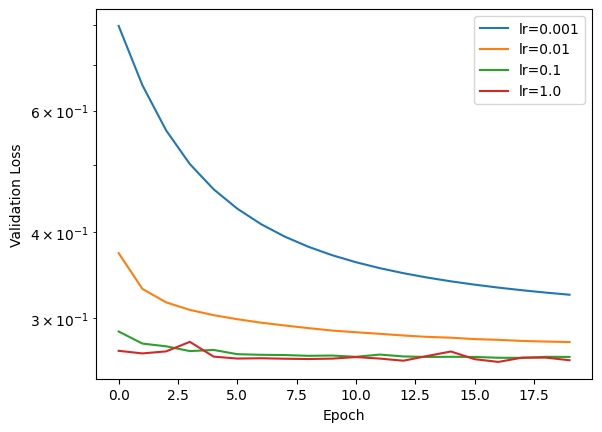

In [29]:
import matplotlib.pyplot as plt

learning_rates = [1e-3, 1e-2, 1e-1, 1.0]

for lr in learning_rates:
    print(f'Training with learning rate = {lr}')
    model2 = build_model(X_train_scaled.shape[1])
    opt = tf.keras.optimizers.SGD(learning_rate=lr)
    model2.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    history = model2.fit(
        X_train_scaled, y_train,
        validation_split=0.2,
        epochs=20,
        batch_size=500,
        verbose=0
    )

    plt.plot(history.history['val_loss'], label=f'lr={lr}')

plt.yscale('log')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()

When using Stochastic Gradient Descent (SGD), the learning rate is the most critical hyperparameter because it controls the size of the steps the model takes toward the minimum of the loss function. In the results, the learning rate of **0.001** is too conservative. While the loss curve is very smooth and stable, indicating that the model is consistently moving in the right direction, the descent is slow that it remains far from the optimal solution after 20 epochs. This creates a risk of underfitting if the training budget is limited.

The learning rate of **0.01** shows a much healthier balance for a standard training run. It achieves a significantly lower validation loss much faster than the smaller rate while maintaining perfect stability. This rate allows the model to capture the general trend of the data without being distracted by noise. However, looking at the graph, it still hasn't quite reached the plateau that the higher rates achieved, suggesting it could still benefit from more training time.

At **0.1**, we see the most efficient convergence. The model reaches its floor almost immediately, within the first 2.5 to 5 epochs. While there are some very slight ripples in the validation loss, they are negligible compared to the speed gains. In most practical scenarios, this would be considered the ideal rate among our choices because it maximizes the utility of each epoch and reaches a high-performing state quickly.

Finally, the learning rate of **1.0** illustrates the danger of setting the rate too high. Although it hits a low loss value instantly, the red line is characterized by jagged oscillations. Because the steps are large, the optimizer is likely overshooting the actual minimum, jumping from one side to the other without settling at the bottom. This lack of stability can prevent the model from reaching the best weights and can sometimes lead to the loss exploding entirely if the rate were any higher.

## 5. Cost-Sensitive Loss

Again, assume:
- False negatives (default) cost £50,000.
- False positives (no loan) cost £5,000.

Implement a loss function that reflects this asymmetric cost.


In [30]:
import tensorflow.keras.backend as K

def cost_sensitive_loss(y_true, y_pred):
    # Convert labels to float
    y_true = K.cast(y_true, K.floatx())
    
    # Numerical stability
    eps = K.epsilon()
    y_pred = K.clip(y_pred, eps, 1 - eps)

    # Write your loss function here. Hint, cross-entropy can be written in this syntax as:
    # loss = - (y_true * K.log(y_pred) + (1 - y_true) * K.log(1 - y_pred))
    
    ############## YOUR CODE HERE ##############
    
    # Weights based on the provided costs
    cost_fn = 50000.0  # Cost of missing a default (y_true=1, y_pred=0)
    cost_fp = 5000.0   # Cost of a false alarm (y_true=0, y_pred=1)

    # Applying the weights to the cross-entropy formula
    loss = -(cost_fn * y_true * K.log(y_pred) + cost_fp * (1 - y_true) * K.log(1 - y_pred))
    
    ############## YOUR CODE HERE ##############
    
    return K.mean(loss)

model3 = build_model(X_train_scaled.shape[1])
model3.compile(loss=cost_sensitive_loss, optimizer='adam', metrics=['accuracy'])

history = model3.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=20,
    batch_size=500,
    verbose=1
)

Epoch 1/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7554 - loss: 5457.7642 - val_accuracy: 0.7757 - val_loss: 4213.5386
Epoch 2/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7748 - loss: 4160.7251 - val_accuracy: 0.7901 - val_loss: 4000.8760
Epoch 3/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7826 - loss: 4006.8828 - val_accuracy: 0.7949 - val_loss: 3938.9297
Epoch 4/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7889 - loss: 3934.6396 - val_accuracy: 0.7913 - val_loss: 3907.8184
Epoch 5/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7890 - loss: 3890.8552 - val_accuracy: 0.7895 - val_loss: 3858.6829
Epoch 6/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7896 - loss: 3856.9832 - val_accuracy: 0.8021 - val_loss: 3856.1660
Epoch 7/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7931 - loss: 3839.2480 - val_accuracy: 0.7860 - val_loss: 3851.9656
Epoch 8/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7906 - loss:

In [31]:
#Let's evaluate the neural network model on the test data.
nn_preds_prob = model3.predict(X_test_scaled)   
nn_preds = (nn_preds_prob >= 0.5).astype(int).ravel()

evaluate_cost(nn_preds, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 344us/step
Test data: 2453 correct out of 2551 positives (accuracy 96.16%)
Test data: 5587 correct out of 7449 negatives (accuracy 75.00%)
TOTAL COST: £1960.00


## 7. Reflection

In 2-3 sentences each, please answer:
- Q1. How does learning rate affect training behavior?
- Q2a. Did anything else you tried improve the model accuracy? 
- Q2b. Why or why not? <br>
(**Q2 Note: marks are based on reflection, not on what accuracy you found!**)
- Q3. Why is cost-sensitive loss more appropriate here than accuracy?


In [33]:
############## YOUR RESPONSE HERE ##############
#
# Question 1:
# The learning rate dictates the step size the optimizer takes toward the minimum loss. A very small rate (like 0.001) results in stable but slow convergence that may underfit, while a very high rate (like 1.0) can cause the model to overshoot the minimum, leading to unstable oscillations or failure to converge.

# Question 2a:
# Beyond adjusting the learning rate, ensuring that the input features were properly normalized through scaling was a key factor in improving performance. We also observed that increasing the number of training epochs allowed the slower learning rates to eventually reach a higher accuracy level that they couldn't achieve in a shorter run.

# Question 2b:
# Feature scaling is highly effective because it prevents features with larger numerical ranges from dominating the gradient updates, creating a more uniform loss surface that SGD can navigate more directly. Additionally, giving the model more time to train (more epochs) is necessary for smaller learning rates because they take small steps. Without enough iterations, they simply stop before reaching the optimal weights.

# Question 3:
# Accuracy treats all misclassifications as equal, but in banking, the financial impact of a false negative (missing a default) is ten times higher than a false positive (denying a good loan). A cost-sensitive loss forces the model to prioritize avoiding the most expensive mistakes, ultimately minimizing the total financial loss rather than just maximizing the percentage of correct guesses.

############## YOUR RESPONSE HERE ##############